## Task

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
%matplotlib inline

In [73]:
Titanic = df = pd.read_csv("C:\\Users\\user\\Desktop\\Machine Learning\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.shape

(891, 12)

In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font size = 5.5> **Performing basic EDA**

<font size = 5.5> Let us check the unique values of each categorical and Numerical column
    <br><br> And check the value counts of each category and numerical in each of the categorical and numerical columns and draw the pie chart.

The unique values for the column PassengerId are: 
		 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 2

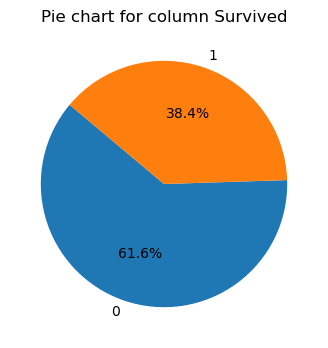

The unique values for the column Pclass are: 
		 [3 1 2] and the number of unique values are 3
Value counts for the column for the 'Pclass' are: 

3    491
1    216
2    184
Name: Pclass, dtype: int64

Do you want to draw a pie chart for the column 'Pclass'? (yes/no): yes


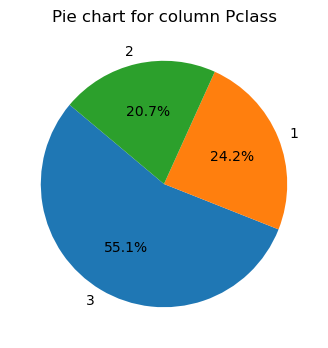

The unique values for the column Name are: 
		 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexa

Do you want to draw a pie chart for the column 'Name'? (yes/no): no
The unique values for the column Sex are: 
		 ['male' 'female'] and the number of unique values are 2
Value counts for the column for the 'Sex' are: 

male      577
female    314
Name: Sex, dtype: int64

Do you want to draw a pie chart for the column 'Sex'? (yes/no): yes


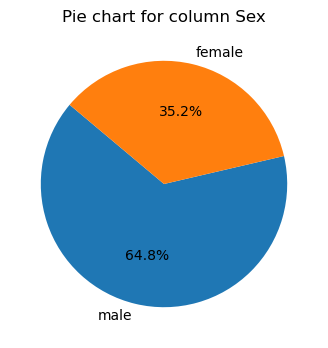

The unique values for the column Age are: 
		 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] and the number of unique values are 88
Value counts for the column for the 'Age' are: 

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Do you want to draw a pie chart for the column 'Age'? (yes/no): no
The unique values for the column SibSp are: 
		 [1 0 3 4 2 5 8] and the number of unique values are 7

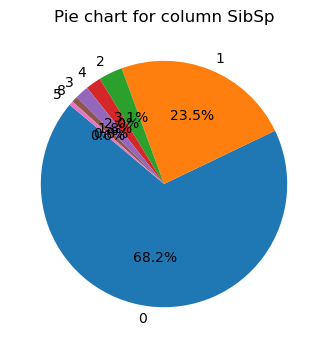

The unique values for the column Parch are: 
		 [0 1 2 5 3 4 6] and the number of unique values are 7
Value counts for the column for the 'Parch' are: 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Do you want to draw a pie chart for the column 'Parch'? (yes/no): yes


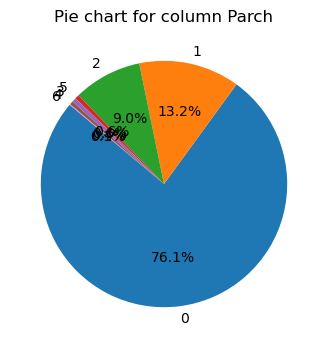

The unique values for the column Ticket are: 
		 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 1775

Do you want to draw a pie chart for the column 'Fare'? (yes/no): no
The unique values for the column Cabin are: 
		 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D1

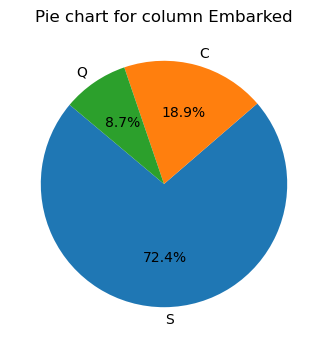

In [78]:
# Iterate through the columns
for col in df.columns:
    if df[col].dtype == "object" or "int64":
        print(f"The unique values for the column {col} are: \n\t\t {df[col].unique()} and the number of unique values are {df[col].nunique()}")
        value_counts = df[col].value_counts()
        print(f"Value counts for the column for the '{col}' are: \n\n{value_counts}\n")
        
        # Ask user if they want to draw the pie chart
        draw_chart = input(f"Do you want to draw a pie chart for the column '{col}'? (yes/no): ")
        
        if draw_chart == 'yes':
            # Plotting the pie chart
            plt.figure(figsize=(4, 4))
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Pie chart for column {col}')
            plt.show()

<font size = 4.5>**Note: Check the value counts of each categorical variable yourself**

<font size = 4.5>**Checking missing values**

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df.shape

(891, 12)

In [81]:
(df.shape[0] - df.Cabin.isnull().sum() )/ df.shape[0]
# We have only approximately 23% rows in the Cabin column

0.22895622895622897

<font size = 4.5>**We will drop the Cabin column as there are a large number of missing values.**

In [82]:
df.drop(columns=["Cabin"],inplace=True) # inplace=True modifies the original dataframe

<font size = 4.5>**Now let us treat the missing values of the Age column**

<Axes: xlabel='Age', ylabel='Count'>

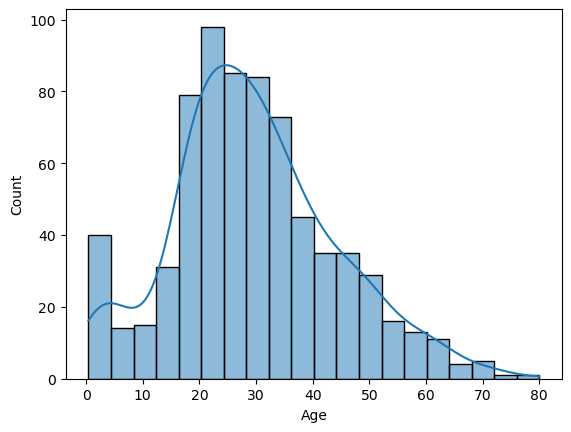

In [83]:
sns.histplot(x=df.Age,kde=True)

In [84]:
{"Mean of Age":df.Age.mean(), "Mode of Age":df.Age.mode()[0], "Median of Age":df.Age.median()}

{'Mean of Age': 29.69911764705882, 'Mode of Age': 24.0, 'Median of Age': 28.0}

<font size = 4.5> Age column is **slightly positively skewed. The median and the mean are close and are representative of the central tendency of the feature.**
    <br><br>Therefore, we can fill the missing values with either the mean or the median. We will use the median

In [85]:
df['Age'].fillna(df['Age'].median(),inplace=True)
# filling of missing values

In [86]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<font size = 4.5>**Removing Unwanted Columns**

In [87]:
df = df.drop(['PassengerId','Name','Ticket',"Embarked"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<font size = 5.5> **Label Encoding**

In [88]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
df["Sex"] = label_encoder.fit_transform(df["Sex"])

# Display the DataFrame
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


<font size = 5.5> **Training the Model**

In [89]:
X  = df.drop(columns=["Survived"])
y = df.Survived

In [108]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

# Random state value in Parth Sir coding is 42 and in mine is 40

In [109]:
# Checking shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [110]:
# Standardizing the dataset for faster convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=  scaler.transform(X_test)

In [111]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [112]:
# Predictions for both train and test datasets
train_pred = LogReg.predict(X_train)
test_pred = LogReg.predict(X_test)

In [113]:
train_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

 <font size = 5.5>**Evaluating model performance**

<font size = 4.5> For train dataset

In [114]:
cm_train = metrics.confusion_matrix(y_train,train_pred)

In [115]:
cm_train

array([[343,  50],
       [ 78, 152]], dtype=int64)

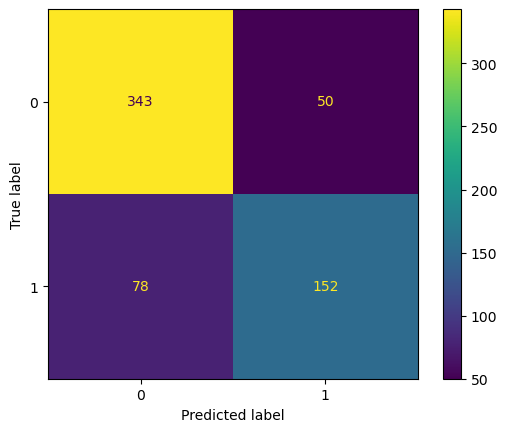

In [116]:
cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cm_disp_train.plot()

In [117]:
metrics.accuracy_score(y_train,train_pred)

0.7945425361155698

In [118]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       393
           1       0.75      0.66      0.70       230

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.77       623
weighted avg       0.79      0.79      0.79       623



<font size = 4.5> **For test dataset**

In [119]:
cm_test = metrics.confusion_matrix(y_test,test_pred)

In [120]:
cm_test

array([[130,  26],
       [ 27,  85]], dtype=int64)

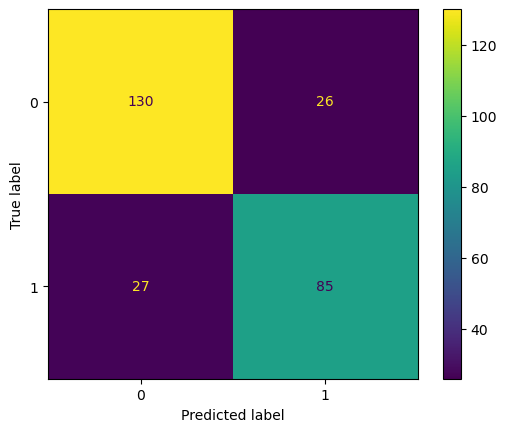

In [121]:
cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
cm_disp_test.plot()

In [122]:
metrics.accuracy_score(y_test,test_pred)

0.8022388059701493

In [123]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       156
           1       0.77      0.76      0.76       112

    accuracy                           0.80       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.80      0.80      0.80       268



<font size = 5.5> **ROC Curve**

In [124]:
y_scores = LogReg.predict_proba(X_test)
y_scores

array([[0.34220204, 0.65779796],
       [0.86245476, 0.13754524],
       [0.27614669, 0.72385331],
       [0.60921066, 0.39078934],
       [0.28594373, 0.71405627],
       [0.75594972, 0.24405028],
       [0.83332888, 0.16667112],
       [0.84846572, 0.15153428],
       [0.70400426, 0.29599574],
       [0.39256562, 0.60743438],
       [0.09908131, 0.90091869],
       [0.630292  , 0.369708  ],
       [0.88738048, 0.11261952],
       [0.85230084, 0.14769916],
       [0.39477961, 0.60522039],
       [0.50606276, 0.49393724],
       [0.36952137, 0.63047863],
       [0.36820382, 0.63179618],
       [0.85306765, 0.14693235],
       [0.77825719, 0.22174281],
       [0.36796595, 0.63203405],
       [0.12377361, 0.87622639],
       [0.2142228 , 0.7857772 ],
       [0.36806249, 0.63193751],
       [0.0651714 , 0.9348286 ],
       [0.26587039, 0.73412961],
       [0.84121135, 0.15878865],
       [0.88717995, 0.11282005],
       [0.6784038 , 0.3215962 ],
       [0.88721746, 0.11278254],
       [0.

In [125]:
y_scores = y_scores[:,1]   
# For the ROC curve function we only require the predicted probabilities for the positive class only
y_scores

array([0.65779796, 0.13754524, 0.72385331, 0.39078934, 0.71405627,
       0.24405028, 0.16667112, 0.15153428, 0.29599574, 0.60743438,
       0.90091869, 0.369708  , 0.11261952, 0.14769916, 0.60522039,
       0.49393724, 0.63047863, 0.63179618, 0.14693235, 0.22174281,
       0.63203405, 0.87622639, 0.7857772 , 0.63193751, 0.9348286 ,
       0.73412961, 0.15878865, 0.11282005, 0.3215962 , 0.11278254,
       0.53309898, 0.12457614, 0.10784631, 0.13345941, 0.15636211,
       0.94432574, 0.12707923, 0.10530022, 0.39280465, 0.63190924,
       0.11283525, 0.16667112, 0.14200938, 0.82067725, 0.67079519,
       0.05252681, 0.11282005, 0.11893978, 0.12120652, 0.11282005,
       0.845408  , 0.0840982 , 0.89372664, 0.9598692 , 0.33880319,
       0.61685778, 0.15219815, 0.89943772, 0.88414077, 0.12055829,
       0.0771908 , 0.47948295, 0.13750079, 0.93037836, 0.28958965,
       0.34369273, 0.87492257, 0.80528596, 0.25864372, 0.69915388,
       0.55536096, 0.95175303, 0.08975425, 0.21624348, 0.12305

In [126]:
# Gives the various values of the threshold used with their corresponding False Positive Rate and True Positive Rate
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_scores)  

In [68]:
thresholds

array([1.9598692 , 0.9598692 , 0.94784437, 0.94432574, 0.92870979,
       0.92834385, 0.85889789, 0.845408  , 0.7857772 , 0.78019103,
       0.7493658 , 0.74436856, 0.72385331, 0.71405627, 0.71254183,
       0.70175659, 0.6908598 , 0.68800601, 0.68425065, 0.68389305,
       0.67445941, 0.67079519, 0.64912563, 0.64678928, 0.64167964,
       0.64069603, 0.6320835 , 0.63203405, 0.63188567, 0.63186447,
       0.6318574 , 0.63179618, 0.63098941, 0.63047863, 0.61685778,
       0.61406472, 0.60570172, 0.60522039, 0.60107911, 0.58924235,
       0.57050243, 0.56262111, 0.55536096, 0.54253735, 0.52614813,
       0.50115442, 0.49562562, 0.49289191, 0.49194619, 0.47510662,
       0.46647338, 0.45832689, 0.45016768, 0.4396312 , 0.4023381 ,
       0.39078934, 0.369708  , 0.35953879, 0.35525232, 0.28958965,
       0.26485051, 0.25919748, 0.25864372, 0.25223647, 0.250014  ,
       0.24882713, 0.24405028, 0.19797323, 0.18952285, 0.17693325,
       0.16667112, 0.1616971 , 0.15878865, 0.15653049, 0.15645

In [128]:
# Calculate the AUC(Area under the curve)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.8869047619047619


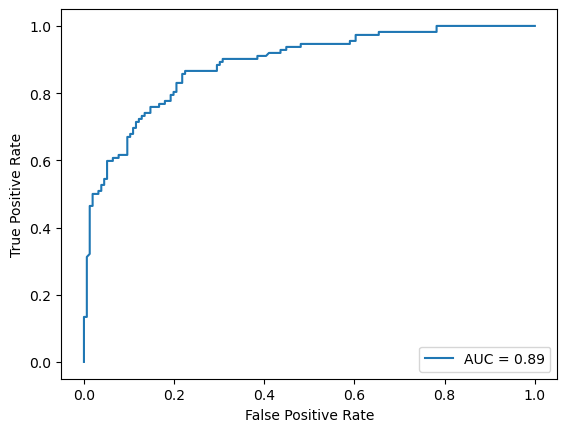

In [129]:
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

In [130]:
import plotly.graph_objs as go

# Create interactive ROC curve
roc_trace = go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='darkorange', width=2),
                       name='ROC curve (area = %0.2f)' % roc_auc)
diagonal_trace = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='navy', width=2, dash='dash'),
                            name='Diagonal')

# Threshold values as hover text
hover_text = ['Threshold: {:.2f}'.format(threshold) for threshold in thresholds]
roc_trace.hoverinfo = 'text'
roc_trace.text = hover_text

layout = go.Layout(title='Receiver Operating Characteristic',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'),
                   showlegend=True)

fig = go.Figure(data=[roc_trace, diagonal_trace], layout=layout)
fig.show()
